In [390]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

In [391]:
#Import Library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

In [392]:
# Import Data
# Data awal disimpan kedalam frame data
data = pd.read_csv('dataset/datasetFull.csv')
data

,Timestamp,EmailAddress,NamaLengkap,NIM,Angkatan,GolonganUKT,NoHP,IPGanjil,OrganisasiGanjil,KerjaGanjil,IPGenap,OrganisasiGenap,KerjaGenap
0,23/09/2022 16:57,all4yandaru@gmail.com,Liek Allyandaru,123180054,2018,4,82136564484,3.83,Ya,Tidak,3.96,Tidak,Tidak
1,23/09/2022 18:16,isnan.rizqikurniawan@gmail.com,Isnan Rizqi Kurniawan,123170041,2017,4,81215255331,3.83,Ya,Tidak,3.80,Ya,Tidak
2,23/09/2022 18:20,michelpiercetahya@gmail.com,Michel Pierce Tahya,123210103,2021,5,85156441564,3.90,Tidak,Tidak,3.70,Ya,Tidak
3,23/09/2022 18:20,indahyaniomel@gmail.com,Indahyani,123180013,2018,1,-,3.60,Tidak,Tidak,2.83,Tidak,Tidak
4,23/09/2022 18:20,dilaajengm@gmail.com,Dila Ajeng Meiliawati,123180009,2018,4,81275270774,3.62,Tidak,Tidak,3.70,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12/10/2022 10:52,anggita.setiyani@gmail.com,Anggita Setiyani Putri,124190037,2019,2,-,3.82,Ya,Tidak,3.48,Tidak,Ya
206,12/10/2022 11:11,123210098@student.upnyk.ac.id,Aditya Prayoga,123210098,2021,3,Gak usah mas,3.86,Ya,Tidak,3.60,Tidak,Tidak
207,12/10/2022 13:13,aliyahalmairah1506@gmail.com,A. Aliyah Almairah Syarif Putri,123190003,2019,4,89606347306,3.65,Ya,Tidak,3.11,Ya,Tidak
208,12/10/2022 15:32,nikolasnanda@gmail.com,Nicholas Nanda Sulaksana,123180049,2018,4,6.28E+12,3.83,Ya,Tidak,4.00,Ya,Tidak


In [393]:
# Data banyaknya angkatan
angkatan = pd.DataFrame(data['Angkatan'].value_counts()).reset_index()
angkatan = angkatan.rename(columns={'Angkatan': 'Count'})
angkatan = angkatan.rename(columns={'index': 'Angkatan'})
angkatan = angkatan.head(5)
angkatan

,Angkatan,Count
0,2018,65
1,2019,47
2,2020,43
3,2021,42
4,2017,13


In [394]:
# Penghapusan kolom data yang tidak digunakan
columns = ['Timestamp','EmailAddress','NamaLengkap','NoHP']
dataFilter = data.copy()
dataFilter.drop(columns, inplace= True, axis=1)
dataFilter = dataFilter.reset_index()

In [395]:
yesNoIndex = {'Ya':1,'Tidak':0}
# angkatan = {2021:0,2020:1,2019:2,2018:3,2017:4}
dataFilter = dataFilter.replace(yesNoIndex)
# dataFilter = dataFilter.replace(angkatan)
dataFilter

,index,NIM,Angkatan,GolonganUKT,IPGanjil,OrganisasiGanjil,KerjaGanjil,IPGenap,OrganisasiGenap,KerjaGenap
0,0,123180054,2018,4,3.83,1,0,3.96,0,0
1,1,123170041,2017,4,3.83,1,0,3.80,1,0
2,2,123210103,2021,5,3.90,0,0,3.70,1,0
3,3,123180013,2018,1,3.60,0,0,2.83,0,0
4,4,123180009,2018,4,3.62,0,0,3.70,0,0
...,...,...,...,...,...,...,...,...,...,...
205,205,124190037,2019,2,3.82,1,0,3.48,0,1
206,206,123210098,2021,3,3.86,1,0,3.60,0,0
207,207,123190003,2019,4,3.65,1,0,3.11,1,0
208,208,123180049,2018,4,3.83,1,0,4.00,1,0


In [396]:
dataGanjil = dataFilter[['IPGanjil','OrganisasiGanjil','KerjaGanjil']]
dataGenap = dataFilter[['NIM','IPGenap','OrganisasiGenap','KerjaGenap']]
dataGenap


,NIM,IPGenap,OrganisasiGenap,KerjaGenap
0,123180054,3.96,0,0
1,123170041,3.80,1,0
2,123210103,3.70,1,0
3,123180013,2.83,0,0
4,123180009,3.70,0,0
...,...,...,...,...
205,124190037,3.48,0,1
206,123210098,3.60,0,0
207,123190003,3.11,1,0
208,123180049,4.00,1,0


In [397]:
dataFinal = pd.DataFrame({
    'IP' : dataGenap['IPGenap'],
    'Organisasi' : dataGenap['OrganisasiGenap'],
    'Kerja' : dataGenap['KerjaGenap'],
    })
dataFinal

,IP,Organisasi,Kerja
0,3.96,0,0
1,3.80,1,0
2,3.70,1,0
3,2.83,0,0
4,3.70,0,0
...,...,...,...
205,3.48,0,1
206,3.60,0,0
207,3.11,1,0
208,4.00,1,0


In [398]:
# Mengetahui persebaran data untuk IP Ganjil
fig = px.box(dataGanjil, x = "IPGanjil")
fig.show()

In [399]:
# Mengetahui persebaran data untuk IP Genap
fig = px.box(dataGenap, x = "IPGenap")
fig.show()

In [400]:
outliers = []
fixOutlier = dataGenap.copy()
fixOutlierDummy = fixOutlier.copy()
print(fixOutlier.to_string())

           NIM  IPGenap  OrganisasiGenap  KerjaGenap
0    123180054     3.96                0           0
1    123170041     3.80                1           0
2    123210103     3.70                1           0
3    123180013     2.83                0           0
4    123180009     3.70                0           0
5    123180094     3.65                0           0
6    123200065     3.60                0           0
7    123200056     3.62                1           0
8    123200023     3.77                1           1
9    123180001     3.37                0           0
10   123200139     3.83                1           0
11   123200053     3.77                0           0
12   123200013     3.88                1           0
13   123200058     3.92                0           0
14   123190100     3.92                0           0
15   123200149     3.67                0           0
16   123180039     3.70                1           0
17   123190106     3.60                0      

In [425]:
# Penerapan Metode Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination="auto")
X = dataFinal[['IP','Organisasi','Kerja']].values
dataX= np.array(dataFinal[['IP']])
dataY= np.array(dataFinal[['Organisasi']])
dataZ= np.array(dataFinal[['Kerja']])

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
round_off_values = np.around(X_scores, decimals =2)
new =round_off_values*(-1)

In [405]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
pd.DataFrame(out_mask).value_counts()

False    180
True      30
dtype: int64

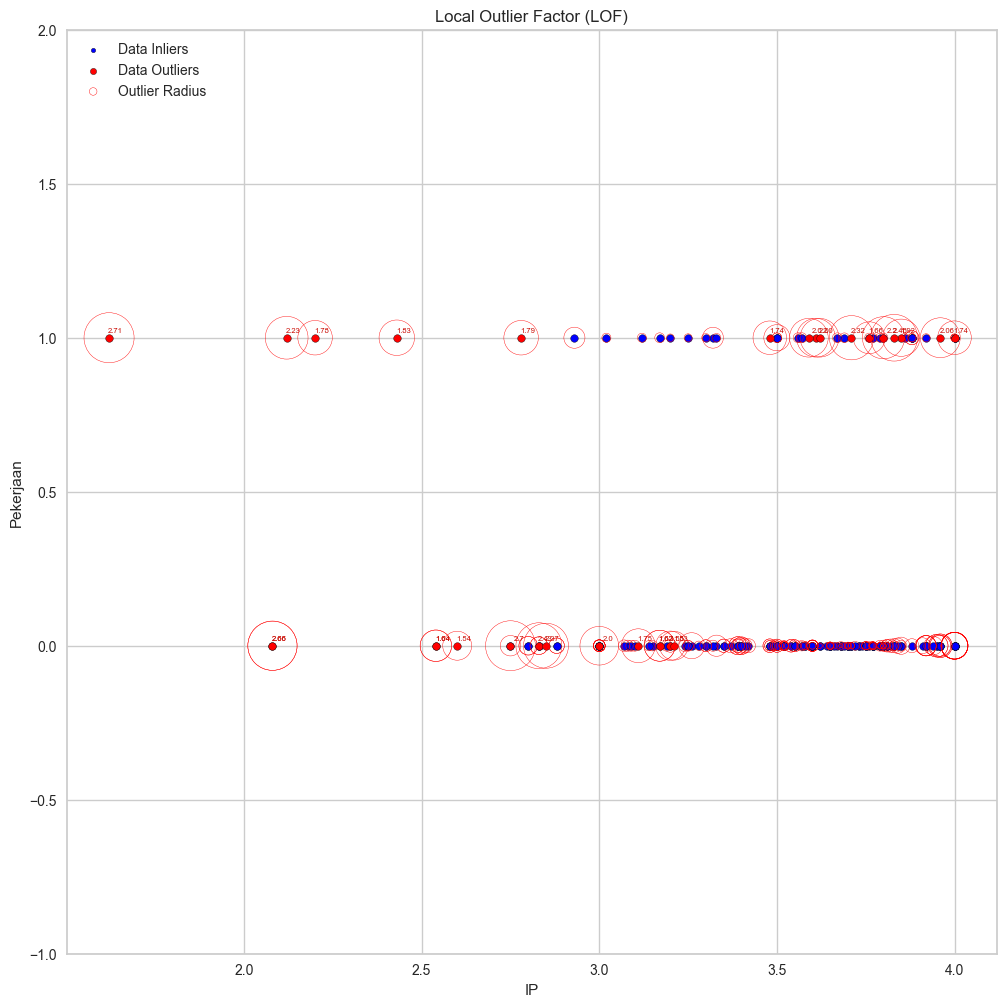

In [406]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 2], c = 'blue',
                edgecolor = 'k', s = 30, label='Data Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 2], c = 'red',
                edgecolor = 'k', s = 30, label='Data Outliers')
# radius
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
c = plt.scatter(dataX, dataZ, s=radius * 1300, edgecolors='red',facecolors='none', label='Outlier Radius')
#label
for x_pos, y_pos, label in zip(dataX,dataZ,new):
    if label>=1.5:
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
plt.xlabel('IP');
plt.ylabel('Pekerjaan');
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.ylim((-1, 2))
plt.show()

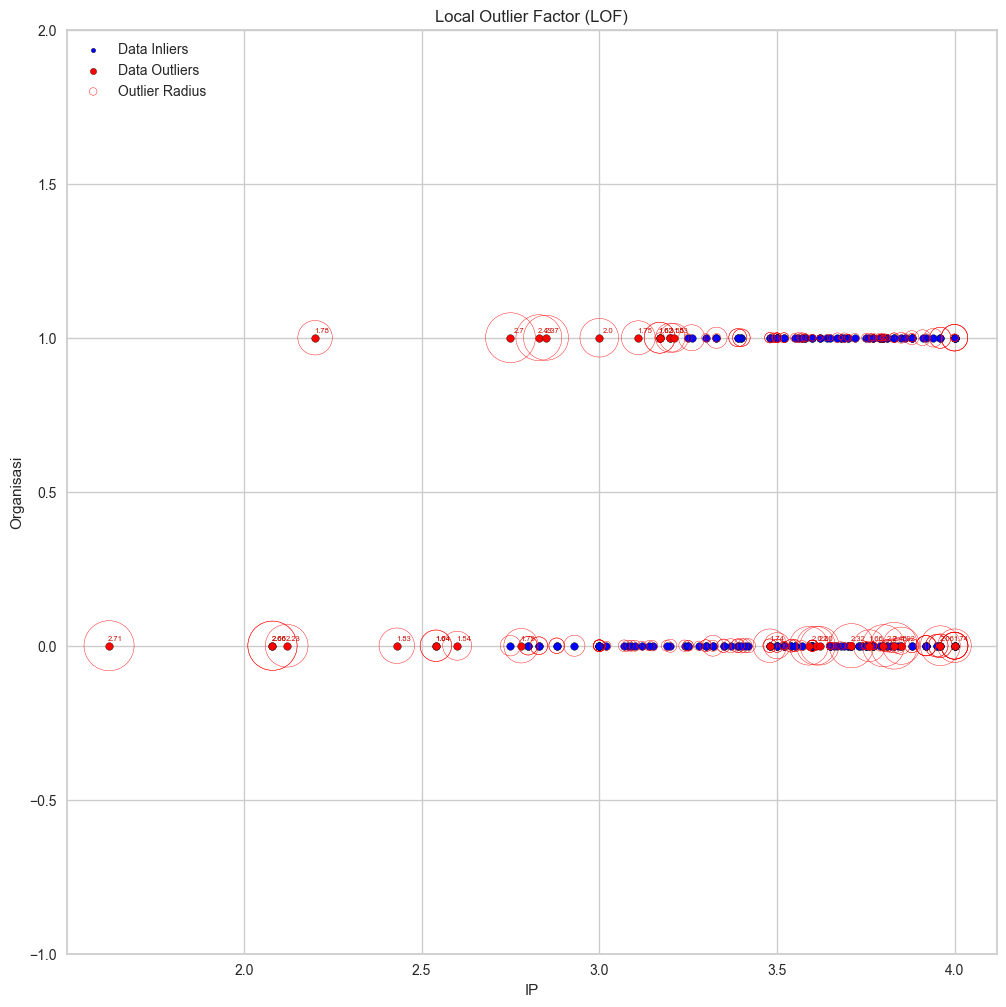

In [407]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30, label='Data Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30, label='Data Outliers')
# radius
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
c = plt.scatter(dataX, dataY, s=radius * 1300, edgecolors='red',facecolors='none', label='Outlier Radius')
#label
for x_pos, y_pos, label in zip(dataX,dataY,new):
    if label>=1.5:
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
plt.xlabel('IP');
plt.ylabel('Organisasi');
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.ylim((-1, 2))
plt.show()

In [428]:
datas = pd.DataFrame(new)
outlier = []
i = 0
for score in datas[0]:
    if score >= 1.5:
        print(fixOutlierDummy["NIM"][i])
        outlier.append(i)
        outliers.append(fixOutlierDummy["NIM"][i])
    i += 1

# print(outlier)

123180165
123210051
123180161
123180151
123190042
124200038
123190089
123190049


In [432]:
len(outliers)

38

In [433]:
dataFinal.drop(outlier, inplace=True)
fixOutlierDummy.drop(outlier, inplace=True)
dataFinal = dataFinal.reset_index(drop=True)
fixOutlierDummy = fixOutlierDummy.reset_index(drop=True)

In [435]:
fixOutlier

,NIM,IPGenap,OrganisasiGenap,KerjaGenap
0,123180054,3.96,0,0
1,123170041,3.80,1,0
2,123210103,3.70,1,0
3,123180013,2.83,0,0
4,123180009,3.70,0,0
...,...,...,...,...
205,124190037,3.48,0,1
206,123210098,3.60,0,0
207,123190003,3.11,1,0
208,123180049,4.00,1,0


In [448]:
x = []
for nim in fixOutlier["NIM"]:
    if nim in outliers:
        x.append("Outlier")
    else:
        x.append("Inlier")
fixOutlier["Outlier"] = x

In [449]:
fixOutlier

,NIM,IPGenap,OrganisasiGenap,KerjaGenap,Outlier
0,123180054,3.96,0,0,Inlier
1,123170041,3.80,1,0,Inlier
2,123210103,3.70,1,0,Inlier
3,123180013,2.83,0,0,Inlier
4,123180009,3.70,0,0,Inlier
...,...,...,...,...,...
205,124190037,3.48,0,1,Outlier
206,123210098,3.60,0,0,Inlier
207,123190003,3.11,1,0,Outlier
208,123180049,4.00,1,0,Inlier


In [ ]:
outlierIndex = {-1:"Outlier",1:"Inlier"}
outlier = pd.DataFrame(y_pred)
outlier = outlier.replace(outlierIndex)
dataKu = pd.DataFrame(X)
dataKu['Outlier'] = outlier
dataKu = dataKu.rename(columns={0: 'IP'})
dataKu = dataKu.rename(columns={1: 'Organisasi'})
dataKu = dataKu.rename(columns={2: 'Kerja'})
dataKu

In [451]:
scatter_fig = px.scatter_3d(fixOutlier, x='IPGenap', y='OrganisasiGenap', z='KerjaGenap', color = 'Outlier', opacity=0.7)
scatter_fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [412]:
# Instantiate
scaler = MinMaxScaler()

# fit_transform
dataScaled = dataFinal.copy()
# dataScaled = scaler.fit_transform(dataFinal)
# dataScaled = pd.DataFrame(dataScaled)
dataScaled

,IP,Organisasi,Kerja
0,3.96,0,0
1,3.80,1,0
2,3.70,1,0
3,2.83,0,0
4,3.70,0,0
...,...,...,...
175,3.40,0,0
176,3.94,1,0
177,3.60,0,0
178,4.00,1,0


In [413]:
# dataScaled = dataScaled.drop(columns=['Cluster'])
# dataFinal = dataFinal.drop(columns=['Cluster'])

In [414]:
# Modelling
# Elbow Method

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(dataScaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
fig_elbow = px.line(x=range_n_clusters, y=ssd, labels={'x' :'Cluster', 'y' :'Elbow SSE(Sum of Square Error)'} )
fig_elbow

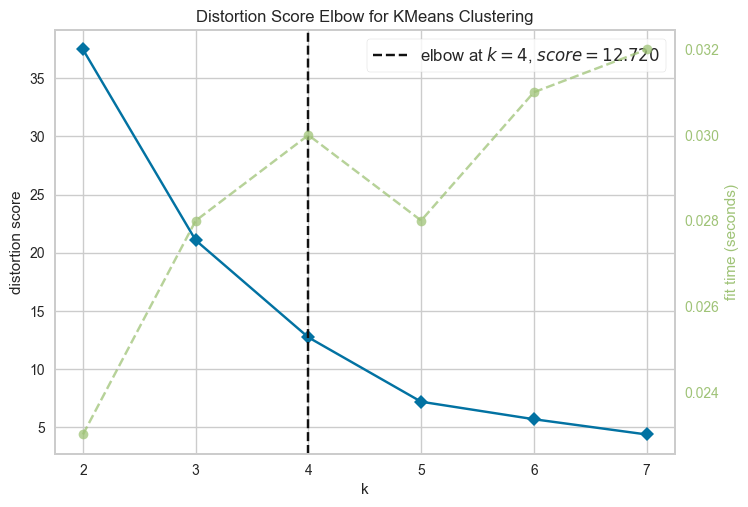

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [415]:
km = KMeans(random_state=56, max_iter=300)
visualizer = KElbowVisualizer(km, k=(2,8))
 
visualizer.fit(dataScaled)
visualizer.show() 

In [416]:
# K-Means Method

kmeans = KMeans(n_clusters=3, max_iter=300, random_state= 56)
kmeans.fit(dataScaled)
labels = kmeans.predict(dataScaled)
samplesCentroids = kmeans.cluster_centers_[labels]

In [417]:
dataScaled.insert(3,"Cluster", kmeans.labels_.astype(str))
dataFinal.insert(3,"Cluster", kmeans.labels_.astype(str))
dataScaled

,IP,Organisasi,Kerja,Cluster
0,3.96,0,0,0
1,3.80,1,0,1
2,3.70,1,0,1
3,2.83,0,0,0
4,3.70,0,0,0
...,...,...,...,...
175,3.40,0,0,0
176,3.94,1,0,1
177,3.60,0,0,0
178,4.00,1,0,1


In [418]:
dataFinal["Cluster"].value_counts()

0    99
1    52
2    29
Name: Cluster, dtype: int64

In [419]:
# dataPlot = dataScaled[[0,1,2]]
dataPlot = dataScaled.drop(columns=['Cluster'])
dataPlot

,IP,Organisasi,Kerja
0,3.96,0,0
1,3.80,1,0
2,3.70,1,0
3,2.83,0,0
4,3.70,0,0
...,...,...,...
175,3.40,0,0
176,3.94,1,0
177,3.60,0,0
178,4.00,1,0


In [420]:
# scatter_fig = px.scatter(dataPlot, x=test.T[0], y=test.T[1], color = dataScaled['Cluster'], opacity=0.7)
scatter_fig = px.scatter_3d(dataPlot, x="IP", y="Organisasi", z="Kerja", color = dataScaled['Cluster'], opacity=0.7)
scatter_fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
scatter_fig



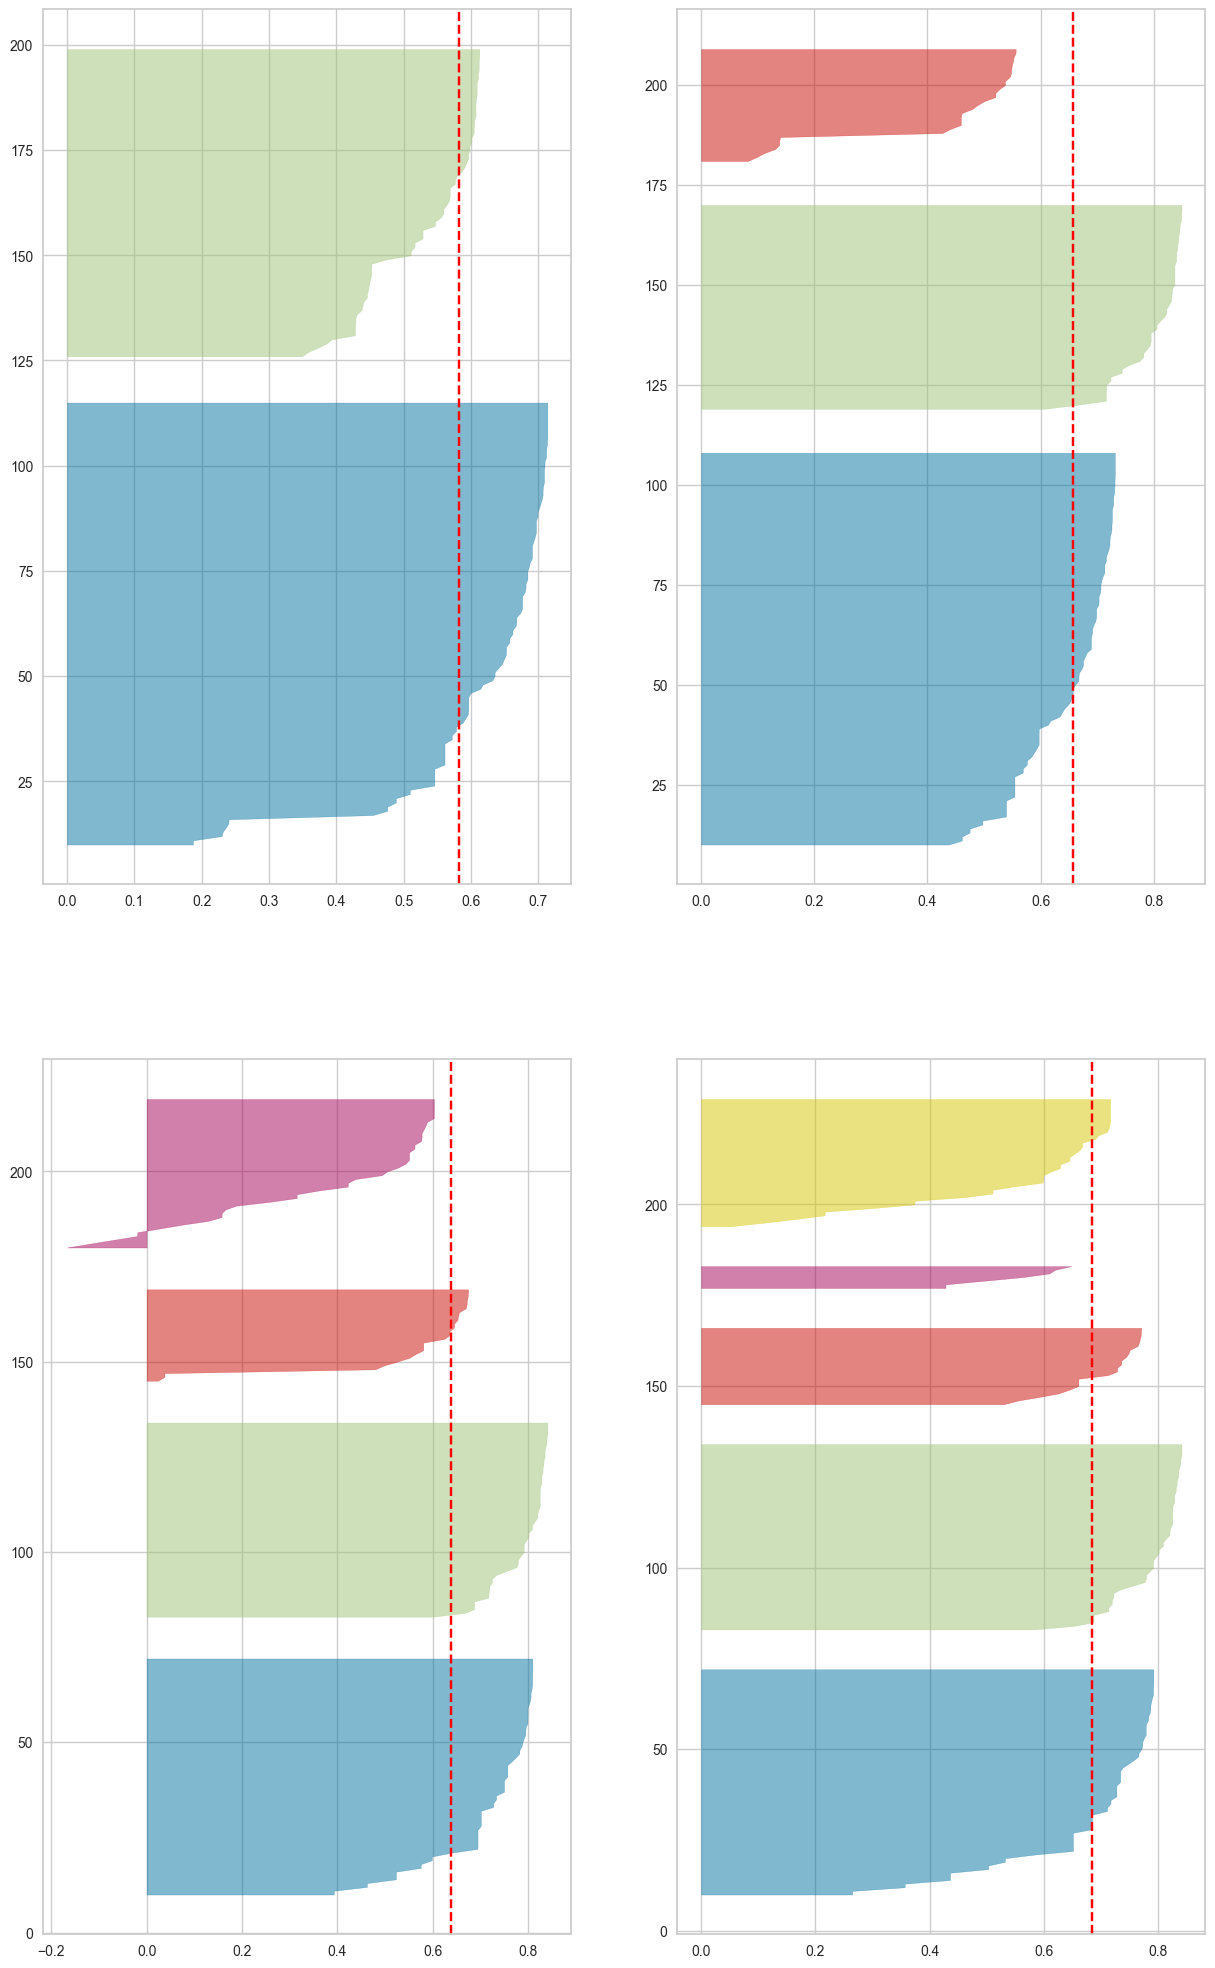

In [421]:
fig, ax = plt.subplots(2, 2, figsize=(15,25))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, max_iter=300, random_state=56)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataPlot) 

In [422]:
# Silhouette Score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

s_cluster = 0
max_score = 0

results_sil = {}

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataPlot)
    
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(dataPlot, cluster_labels)

    results_sil.update({num_clusters: silhouette_avg})

    if silhouette_avg > max_score:
      max_score = silhouette_avg
      s_cluster = num_clusters

#Visualize
fig_silhouette = px.line( x= list(results_sil.keys()), y=list(results_sil.values()), labels={'x' :'Number of Clusters', 'y' :'Silhouette Score'})
fig_silhouette

# sil_cluster = "Optimal Cluster = {}, with {} score.".format(s_cluster, max_score)

In [423]:
# px.scatter(dataFinal['Cluster'], x=dataFinal['IP'], labels={'x' : 'IP', 'y' :'GolonganUKT'}, y=dataFinal["GolonganUKT"], color = dataFinal['Cluster'], )